In [38]:

#--------------------------------------------------------------------------------
# Module 1: Imports RT.IRS_data.csv and cleans it by removing all rows which does  not have 
# data in the "Event"-column. Further it removes all headers and corresponding 
# columns which is empty (no data).
#--------------------------------------------------------------------------------

import pandas as pd
import os

# Define file paths using relative paths
input_file_path = "CME data import/Categorized Data/RT.IRS_Data.csv"
output_file_path = "Cleaned Data/RT.IRS_Clean_v1.csv"


# Get the current working directory
current_directory = os.getcwd()


# Construct absolute file paths
input_file_path = os.path.join(current_directory, input_file_path)
output_file_path = os.path.join(current_directory, output_file_path)

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(input_file_path)

# Remove rows where the "Event" column is empty
data = data.dropna(subset=['Event'])

# Remove columns where all values are NaN after removing empty rows
data = data.dropna(axis=1, how='all')

# Remove rows where "Event" column starts with two numbers
data = data[~data['Event'].astype(str).str.match(r'^\d{2}')]

# Save the cleaned data to a new CSV file
data.to_csv(output_file_path, index=False)

print("Data cleaned and saved to", output_file_path)


C:\Users\Valle\AppData\Local\Temp\ipykernel_10888\135098645.py:24: DtypeWarning: Columns (9,14,19,22,24,29,32,34,39,40,41,42,43,44,45,48,52,75,87,91,99,110,112,113,135,139,140,141,143,145,156,157) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file_path)


Data cleaned and saved to c:\Users\Valle\Documents\GitHub\ME2313-T2\Cleaned Data/RT.IRS_Clean_v1.csv


In [39]:
#--------------------------------------------------------------------------------
# Module 2: Sort the rows based on the "Event" column 
#--------------------------------------------------------------------------------

# Remove all rows where Conract Type is NOT InterestRateSwap
data = data[data['Contract Type'] == 'InterestRateSwap']

# Save the cleaned and sorted data to a new CSV file
data.to_csv(output_file_path, index=False)

print("Data cleaned, sorted, and saved to", output_file_path)

Data cleaned, sorted, and saved to c:\Users\Valle\Documents\GitHub\ME2313-T2\Cleaned Data/RT.IRS_Clean_v1.csv


In [40]:
#--------------------------------------------------------------------------------
# Module 3: Define parameters
#--------------------------------------------------------------------------------

# Define the variables from the second sheet
variables_info = {
    "Event": "string",
    "Execution Timestamp": "datetime",
    "Dissemination Time": "datetime",
    "Cleared": "string",
    "Collateralization": "string",
    "End-User Exception": "string",
    "Bespoke": "character",
    "Block/Off facility": "character",
    "Execution Venue": "string",
    "UPI": "string",
    "Product": "string",
    "Contract Type": "string",
    "Effective Date": "date",
    "Maturity Date": "date",
    "Upfront Payment": "int",
    "Upfront Payment Currency": "string",
    "Upfront Payment Date": "date",
    "Settlement Currency": "string",
    "Leg 1 Type": "string",
    "Leg 1 Fixed Rate": "int",
    "Leg 1 Floating Index": "string",
    "Leg 1 Designated Maturity": "string",
    "Leg 1 Spread": "float",
    "Leg 1 Day Count Convention": "string",
    "Leg 1 Notional": "int",
    "Leg 1 Notional Currency": "string",
    "Leg 1 Payment Frequency": "string",
    "Leg1 Reset Frequency": "string",
    "Leg 2 Type": "string",
    "Leg 2 Fixed Rate": "float",
    "Leg 2 Floating Index": "string",
    "Leg 2 Designated Maturity": "string",
    "Leg 2 Spread": "float",
    "Leg 2 Day Count Convention": "string",
    "Leg 2 Notional": "float",
    "Leg 2 Notional Currency": "string",
    "Leg 2 Payment Frequency": "string",
    "Leg 2 Reset Frequency": "string",
    "Embedded Option": "character",
    "Option Strike Price": "float",
    "Option Type": "string",
    "Option Family": "string",
    "Option Currency": "string",
    "Option Premium": "float",
    "Option Lockout Period": "date",
    "Option Expiration Date": "date",
    "Asset Class": "string",
    "Rpt ID": "string",
    "Prev Rpt ID": "string",
    "Future Value Notional": "float",
    "Contract Subtype": "string"
}

print("Variables defined.")




Variables defined.


In [41]:
#--------------------------------------------------------------------------------
# Module 4: Adjust columns according to variables_info and save to CSV
#--------------------------------------------------------------------------------

for column, data_type in variables_info.items():
    if column in data.columns:
        if data_type == "string":
            data[column] = data[column].astype(str)
        elif data_type == "int":
            # Convert to numeric with NaN for non-convertible values
            data[column] = pd.to_numeric(data[column], errors='coerce')
            # Optional: Fill NaN with a placeholder like 0 or -1
            # data[column] = data[column].fillna(0).astype('Int64')
        elif data_type == "float":
            data[column] = pd.to_numeric(data[column], errors='coerce')
        elif data_type == "datetime":
            data[column] = pd.to_datetime(data[column], errors='coerce')
        elif data_type == "date":
            data[column] = pd.to_datetime(data[column], errors='coerce').dt.date
        # Add more conditions as needed for other data types


# Define the output file path for the cleaned data
output_file_path = os.path.join(current_directory, "Cleaned Data/RT.IRS_Clean_v2.csv")

# Save the adjusted data to a CSV file
data.to_csv(output_file_path, index=False)

print("Data adjusted and saved to", output_file_path)


Data adjusted and saved to c:\Users\Valle\Documents\GitHub\ME2313-T2\Cleaned Data/RT.IRS_Clean_v2.csv


In [42]:
#--------------------------------------------------------------------------------
# Module 5: Display DataFrame rows separated by data types
#--------------------------------------------------------------------------------

# Group columns by their data types
columns_by_type = {}
for col, dtype in variables_info.items():
    if col in data.columns:
        columns_by_type.setdefault(dtype, []).append(col)

# Print the top 5 rows for each data type
for dtype, cols in columns_by_type.items():
    print(f"Data Type: {dtype}")
    print(data[cols].head(5))
    print("\n")



Data Type: string
       Event          Cleared     Collateralization End-User Exception  \
0  New Trade  Intend to Clear  Fully Collateralized                nan   
1  New Trade  Intend to Clear  Fully Collateralized                nan   
2  New Trade  Intend to Clear  Fully Collateralized                nan   
3  New Trade  Intend to Clear  Fully Collateralized                nan   
4  New Trade  Intend to Clear  Fully Collateralized                nan   

           Execution Venue  UPI      Product     Contract Type  \
0  Registered Market - DCM  nan   IRS EUR 5Y  InterestRateSwap   
1  Registered Market - DCM  nan   IRS EUR 5Y  InterestRateSwap   
2  Registered Market - DCM  nan   IRS EUR 2Y  InterestRateSwap   
3  Registered Market - DCM  nan   IRS EUR 2Y  InterestRateSwap   
4  Registered Market - DCM  nan  IRS EUR 10Y  InterestRateSwap   

  Upfront Payment Currency Settlement Currency  ... Leg 2 Notional Currency  \
0                      nan                 EUR  ...          

Numerical columns:  ['Upfront Payment', 'Leg 1 Fixed Rate', 'Leg 1 Spread', 'Leg 1 Notional', 'Leg 2 Fixed Rate', 'Leg 2 Spread', 'Leg 2 Notional', 'Option Strike Price', 'Option Premium', 'Future Value Notional']
Categorical columns:  ['Event', 'Cleared', 'Collateralization', 'End-User Exception', 'Bespoke', 'Block/Off facility', 'Execution Venue', 'UPI', 'Product', 'Contract Type', 'Upfront Payment Currency', 'Settlement Currency', 'Leg 1 Type', 'Leg 1 Floating Index', 'Leg 1 Designated Maturity', 'Leg 1 Day Count Convention', 'Leg 1 Notional Currency', 'Leg 1 Payment Frequency', 'Leg1 Reset Frequency', 'Leg 2 Type', 'Leg 2 Floating Index', 'Leg 2 Designated Maturity', 'Leg 2 Day Count Convention', 'Leg 2 Notional Currency', 'Leg 2 Payment Frequency', 'Leg 2 Reset Frequency', 'Embedded Option', 'Option Type', 'Option Family', 'Option Currency', 'Asset Class', 'Rpt ID', 'Prev Rpt ID', 'Contract Subtype']
Other (non-categorized) columns:  ['Execution Timestamp', 'Dissemination Time', '

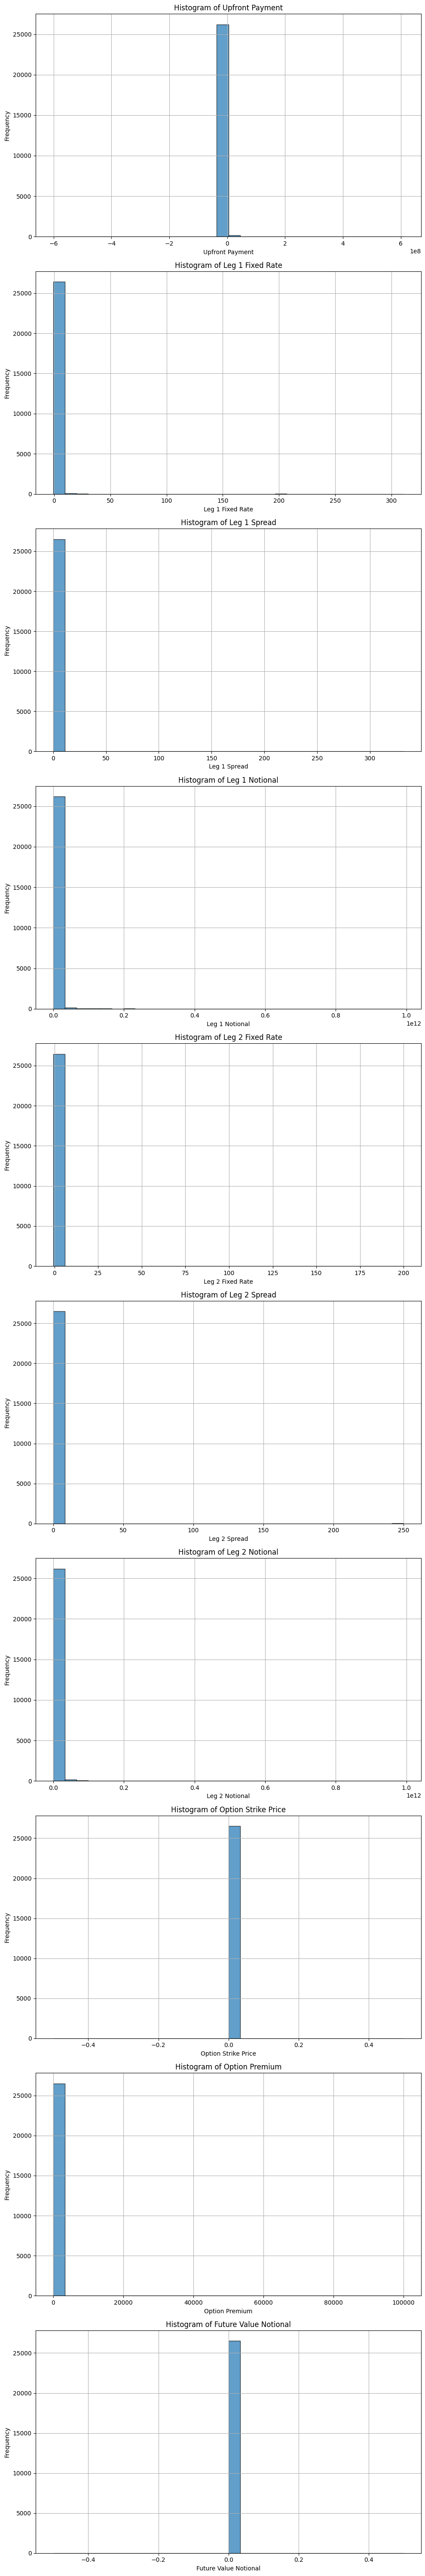

In [43]:
#--------------------------------------------------------------------------------
# Module 6: Divide columns to categorical & numerical
#--------------------------------------------------------------------------------
import pandas as pd
# Categorize columns based on the variables_info dictionary
numerical_columns = [col for col, dtype in variables_info.items() if dtype in ["int", "float"] and col in data.columns]
categorical_columns = [col for col, dtype in variables_info.items() if dtype in ["string", "character"] and col in data.columns]


#TESTADE att ta bort att fylla i tomma värden men då funkar ej GAN modellen, kan visa vid tilfälle. MÅSTE HANTERAS
# Fill missing values in numerical columns with their median
for column in numerical_columns:
    median_value = data[column].median()
    #data[column].fillna(median_value, inplace=True)
    data[column].fillna(0,inplace=True)
    #data[column] = data[column].diff() #First difference attempt
     

# Fill missing values in categorical columns with their mode
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


# Columns that have not been categorized as either numerical or categorical
other_columns = [col for col in data.columns if col not in numerical_columns and col not in categorical_columns]


print("Numerical columns: ", numerical_columns)
print("Categorical columns: ", categorical_columns)
print("Other (non-categorized) columns: ", other_columns)

import matplotlib.pyplot as plt



def plot_all_numerical_columns(data, numerical_columns):
    """
    Plots histograms for all numerical columns in the DataFrame.

    :param data: pandas DataFrame containing the data.
    :param numerical_columns: List of names of the numerical columns.
    """
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 6 * num_cols))

    for i, column in enumerate(numerical_columns):
        if column in data.columns:
            ax = axes[i] if num_cols > 1 else axes
            ax.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
            ax.set_title(f'Histogram of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
            ax.grid(True)
        else:
            print(f"Column '{column}' doesn't exist in the DataFrame.")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_all_numerical_columns(data, numerical_columns)


In [44]:
#--------------------------------------------------------------------------------
# Module 7: List unique values count for each categorical column 
#   1. Used to understand how extensive the one hot encoding will be
#   2. Reveals if any columns shuld be removed (too many unique values)
#--------------------------------------------------------------------------------

unique_counts = {}

for column in categorical_columns:
    unique_counts[column] = data[column].nunique()

# Display the counts
for column, count in unique_counts.items():
    print(f"{column}: {count} unique values")


Event: 27 unique values
Cleared: 4 unique values
Collateralization: 4 unique values
End-User Exception: 3 unique values
Bespoke: 2 unique values
Block/Off facility: 2 unique values
Execution Venue: 4 unique values
UPI: 4 unique values
Product: 751 unique values
Contract Type: 1 unique values
Upfront Payment Currency: 2 unique values
Settlement Currency: 27 unique values
Leg 1 Type: 4 unique values
Leg 1 Floating Index: 18 unique values
Leg 1 Designated Maturity: 451 unique values
Leg 1 Day Count Convention: 7 unique values
Leg 1 Notional Currency: 27 unique values
Leg 1 Payment Frequency: 9 unique values
Leg1 Reset Frequency: 8 unique values
Leg 2 Type: 4 unique values
Leg 2 Floating Index: 230 unique values
Leg 2 Designated Maturity: 451 unique values
Leg 2 Day Count Convention: 6 unique values
Leg 2 Notional Currency: 27 unique values
Leg 2 Payment Frequency: 9 unique values
Leg 2 Reset Frequency: 8 unique values
Embedded Option: 2 unique values
Option Type: 2 unique values
Option Fa

In [50]:
#--------------------------------------------------------------------------------
# Module 8: Conditionally remove selected columns
#   1. Specify the columns to be removed with a True/False flag in a dictionary.
#   2. Use the drop method to remove columns marked as True.
#--------------------------------------------------------------------------------

# Dictionary of columns with True/False flags for removal

# True = Remove
columns_to_remove = {
    "Event": True,
    "Execution Timestamp": True,
    "Dissemination Time": True,
    "Cleared": True,
    "Collateralization": True,
    "End-User Exception": True,
    "Bespoke": True,
    "Block/Off facility": True,
    "Execution Venue": True,
    "UPI": True,
    "Product": True,
    "Contract Type": True,
    "Effective Date": True, #OBS!!!! include new field that corresponds to contract lenght
    "Maturity Date": True,
    "Upfront Payment": True,
    "Upfront Payment Currency": True,
    "Upfront Payment Date": True,
    "Settlement Currency": True,
    "Leg 1 Type": False,
    "Leg 1 Fixed Rate": False,
    "Leg 1 Floating Index": False,
    "Leg 1 Designated Maturity": True,
    "Leg 1 Spread": False,
    "Leg 1 Day Count Convention": False,
    "Leg 1 Notional": False,
    "Leg 1 Notional Currency": False,
    "Leg 1 Payment Frequency": False,
    "Leg1 Reset Frequency": False,
    "Leg 2 Type": False,
    "Leg 2 Fixed Rate": False,
    "Leg 2 Floating Index": False,
    "Leg 2 Designated Maturity": True,
    "Leg 2 Spread": False,
    "Leg 2 Day Count Convention": False,
    "Leg 2 Notional": False,
    "Leg 2 Notional Currency": False,
    "Leg 2 Payment Frequency": False,
    "Leg 2 Reset Frequency": False,
    "Embedded Option": True,
    "Option Strike Price": True,
    "Option Type": True,
    "Option Family": True,
    "Option Currency": True,
    "Option Premium": True,
    "Option Lockout Period": True,
    "Option Expiration Date": True,
    "Asset Class": True,
    "Rpt ID": True,
    "Prev Rpt ID": True,
    "Future Value Notional": False,
    "Contract Subtype": True
}

# Remove columns marked as True
removed_columns = [col for col, remove in columns_to_remove.items() if remove and col in data.columns]
data.drop(removed_columns, axis=1, inplace=True)

# Update the list of numerical columns
numerical_columns = [col for col in numerical_columns if col not in removed_columns]
categorical_columns = [col for col in categorical_columns if col not in removed_columns]
print(data)

# Display the list of removed columns
print("Removed columns:", removed_columns)



      Leg 1 Type  Leg 1 Fixed Rate Leg 1 Floating Index  Leg 1 Spread  \
0          Fixed          0.002292                  nan           0.0   
1          Fixed          0.002292                  nan           0.0   
2          Fixed          0.002842                  nan           0.0   
3          Fixed          0.002842                  nan           0.0   
4          Fixed          0.003542                  nan           0.0   
...          ...               ...                  ...           ...   
33388      Fixed          0.006872                  nan           0.0   
33389      Fixed          0.006872                  nan           0.0   
33390      Fixed          0.006872                  nan           0.0   
33391      Fixed          0.006872                  nan           0.0   
33392      Fixed          0.009840                  nan           0.0   

      Leg 1 Day Count Convention  Leg 1 Notional Leg 1 Notional Currency  \
0                        ACT/360        0.00020

In [46]:
#--------------------------------------------------------------------------------
# Module 9: Date/timestamp management
#   1. Denna modul ska hantera datum per TriOptimas instruktioner via mejl
#--------------------------------------------------------------------------------



In [52]:
#--------------------------------------------------------------------------------
# Module 10: Save Cleaned Preprocessed Data to CSV
#   1. Used for simple random generating model
#--------------------------------------------------------------------------------

# Define the output file path for the cleaned data
cleaned_data_file_path = os.path.join(current_directory, "Cleaned Data/RT.IRS_Clean_v2_RandomModel.csv")

# Save the cleaned data to a CSV file
data.to_csv(cleaned_data_file_path, index=False)
print(data)
print("Cleaned data saved to", cleaned_data_file_path)


      Leg 1 Type  Leg 1 Fixed Rate Leg 1 Floating Index  Leg 1 Spread  \
0          Fixed          0.002292                  nan           0.0   
1          Fixed          0.002292                  nan           0.0   
2          Fixed          0.002842                  nan           0.0   
3          Fixed          0.002842                  nan           0.0   
4          Fixed          0.003542                  nan           0.0   
...          ...               ...                  ...           ...   
33388      Fixed          0.006872                  nan           0.0   
33389      Fixed          0.006872                  nan           0.0   
33390      Fixed          0.006872                  nan           0.0   
33391      Fixed          0.006872                  nan           0.0   
33392      Fixed          0.009840                  nan           0.0   

      Leg 1 Day Count Convention  Leg 1 Notional Leg 1 Notional Currency  \
0                        ACT/360        0.00020

In [53]:
#--------------------------------------------------------------------------------
# Module 11: Normalization for machine learning suitability
#   1. Normalize numerical features to ensure they have a similar scale.
#   2. One-hot encode categorical features to convert them into a format suitable for the machine learning model.
#--------------------------------------------------------------------------------

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Normalize numerical features using RobustScaler
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler(feature_range=(0,1))
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
# Check the min and max values
min_values = data[numerical_columns].min()
max_values = data[numerical_columns].max()

# Check if any value is below -1 or above 1
outside_range = (min_values < -1).count() or (max_values > 1).count()

# Print results
print("Min values:\n", min_values)
print("Max values:\n", max_values)
print("Any value outside the [-1, 1] range:", outside_range)


# One-hot encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)





Min values:
 Leg 1 Fixed Rate         0.0
Leg 1 Spread             0.0
Leg 1 Notional           0.0
Leg 2 Fixed Rate         0.0
Leg 2 Spread             0.0
Leg 2 Notional           0.0
Future Value Notional    0.0
dtype: float64
Max values:
 Leg 1 Fixed Rate         1.0
Leg 1 Spread             1.0
Leg 1 Notional           1.0
Leg 2 Fixed Rate         1.0
Leg 2 Spread             1.0
Leg 2 Notional           1.0
Future Value Notional    0.0
dtype: float64
Any value outside the [-1, 1] range: 7
Index(['Leg 1 Type', 'Leg 1 Fixed Rate', 'Leg 1 Floating Index',
       'Leg 1 Spread', 'Leg 1 Day Count Convention', 'Leg 1 Notional',
       'Leg 1 Notional Currency', 'Leg 1 Payment Frequency',
       'Leg1 Reset Frequency', 'Leg 2 Type', 'Leg 2 Fixed Rate',
       'Leg 2 Floating Index', 'Leg 2 Spread', 'Leg 2 Day Count Convention',
       'Leg 2 Notional', 'Leg 2 Notional Currency', 'Leg 2 Payment Frequency',
       'Leg 2 Reset Frequency', 'Future Value Notional'],
      dtype='object')


In [49]:
#--------------------------------------------------------------------------------
# Module 12: Pickle that big boi data for later use in GAN model
#--------------------------------------------------------------------------------

import os

# Ensure the directory "Processed data" exists
if not os.path.exists("Processed data"):
    os.makedirs("Processed data")

# Save the DataFrame as a pickled file
current_directory = os.getcwd()
data_encoded.to_csv("Processed data/data_encoded.csv", index=False)



